## **Tutorial 1 Remake**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.special
import pandas as pd

**Question 1**

Simulate a Poisson process with rate $\theta=0.5$, and different observation times $T=10, 100, 1000$. Plot the simulated data in each case.

- Step 1: Create Poisson distribution
- Step 2: Draw one number from the distribution
- Step 3: Decide how many events (i.e. spikes) there are in a given time-window 0 to T based on number taken by Poisson distribution
- Step 4: Distribute the events uniformly in the time-window between 0 and T

In [2]:
#Define rate
theta=0.5

# Simulate various observation times
Ts = [10, 100, 1000]

The goal here is to generate a list of random samples. 

- For each T in the iterable Ts, generate a random sample of numbers from a uniform distribution between 0 and T (by using np.random.uniform)

- The number of samples (size) is determined by a random value drawn from a Poisson distribution with mean T * rate (using np.random.poisson). 

- The resulting list of samples will have a different number of elements for each T in Ts, and the values in each sample will be random and follow a uniform distribution between 0 and T.

In [10]:
samples=[np.random.uniform(low=0, high=T, size=np.random.poisson(T*theta)) for T in Ts]

Create the plots for each observation times

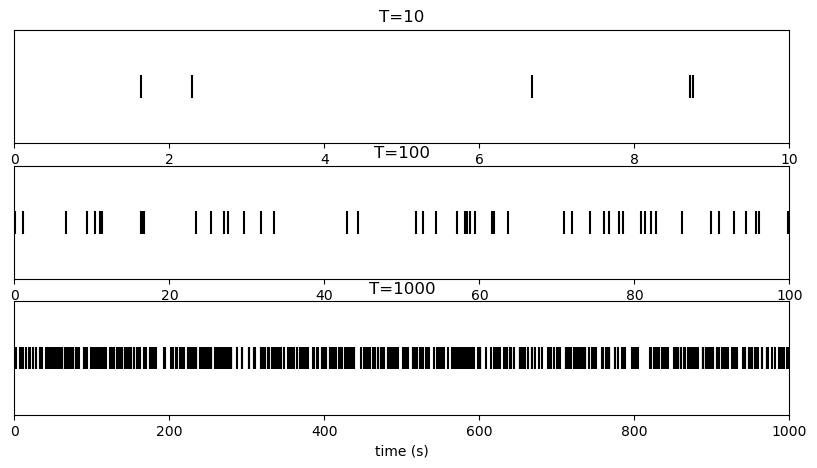

In [4]:
for s in samples: #loop that iterates over each element in the samples collection
    s.sort() #sorts the elements in the s variable in ascending order

#Create a figure with 3 subplots (1 per Ts) in a single column with 10 u in width and 5 u in height
plt.subplots(3, 1, figsize=(10,5))

#Plot Ts=10

plt.subplot(3,1,1) #(line, column, index)
plt.title('T=10')
plt.vlines(samples[0], -0.2, 0.2, color='black') #plot the output of samples[0], which corresponds to the list of samples for T=10 as vertical lines ranging from -0.2 to 0.2 on the y-axis and colored in black
plt.xlim(0,10)
plt.ylim(-1,1)
plt.xlabel('time (s)')
plt.tick_params(left=False, labelleft=False) #remove ticks and labels from the left y-axis of each subplot to make the plot cleaner

#Plot Ts=100

plt.subplot(3,1,2)
plt.title('T=100')
plt.vlines(samples[1], -0.2, 0.2, color='black')
plt.xlim(0,100)
plt.ylim(-1,1)
plt.xlabel('time (s)')
plt.tick_params(left=False, labelleft=False)

#Plot Ts=1000

plt.subplot(3,1,3)
plt.title('T=1000')
plt.vlines(samples[2], -0.2, 0.2, color='black')
plt.xlim(0,1000)
plt.ylim(-1,1)
plt.xlabel('time (s)')
plt.tick_params(left=False, labelleft=False)

**Question 2**

From the observed counts, compute the posterior probability distribution of the rate parameter. Assume a uniform prior distribution over $\theta$.

In [8]:
#Compute the likelihood
def log_likelihood(y,thetaT):
    #It is better to use the log-scale for numerical stability
    #np.log: gives the log
    #scipy.special.loggamma: calculates the log of the gamma function, the argument y+1 is used to make sure that the argument remains positive. This line is like writing log(y!)
    return y * np.log(thetaT)-thetaT-scipy.special.loggamma(y+1)


#Compute the posterior: likelihood*T
def posterior (theta, T, y):
    #np.exp: transforms back from log form to linear form
    #rate * T represents the expected number of events over the entire exposure time T
    return np.exp(log_likelihood(theta*T, y))*T

#


Plot the figures

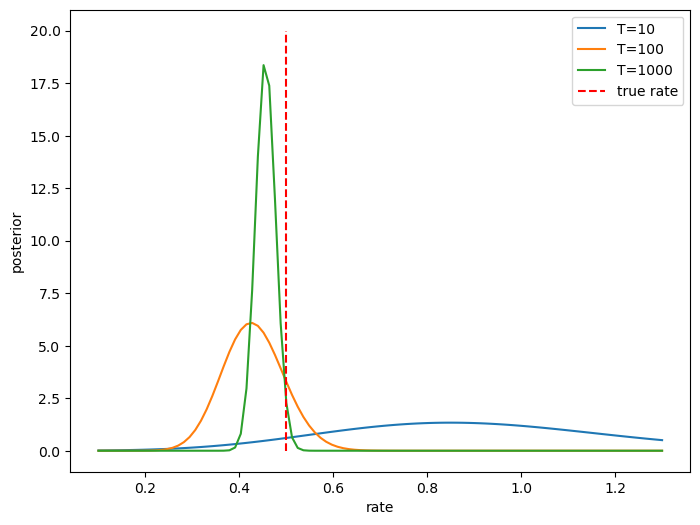

456


In [11]:

plt.figure(figsize=(8,6))
xran = np.linspace(start=0.1, stop=1.3, num=100)

#for (T, ts) in zip (Ts, samples) is a loop that iterates over pairs of values taken from two lists, Ts and samples, in a synchronized or "zipped" manner. 
#If Ts and samples have the same length, it pairs the first element of Ts with the first element of samples, the second element of Ts with the second element of samples, and so on.
for (T, ts) in zip(Ts, samples):
    y = len(ts)
    #for each T and y pair, the code evaluates the posterior for each rate value in xran
    #it then plots the posterior values against the rate values in xran, labelling each curve with the corresponding T value
    plt.plot(xran, [posterior(x, T, y) for x in xran], label=f'T={T}') #f-string: formatted string that will contain the value of T wiithin the string
plt.vlines(theta, ymin=0, ymax=20, color='red', ls='dashed', label='true rate')
plt.xlabel('rate')
plt.ylabel('posterior')
plt.legend()
plt.show()

print(y)

why did they sometimes used 'rate' sometimes 'theta' as nomenclature, it's the same right?

**Question 3**

Compute the mean estimator, the maximum-likelihood estimator (MLE), and the estimator variance.

In [37]:
#Compute the mean, the MLE and the variance for each T

#samples is a list of 3 arrays which all contain a different amount of elements, the im[ortant thing is that the length of samples[0] == length of Ts[0] and so on for the zip to work!
for (T,ts) in zip (Ts,samples):
    y=len(ts)
    print(f'T={T};<theta>={(y+1/T)}; MLE={y/T}; var={(y+1)/T**2}')



T=10;<theta>=9.1; MLE=0.9; var=0.1
T=100;<theta>=43.01; MLE=0.43; var=0.0044
T=1000;<theta>=456.001; MLE=0.456; var=0.000457


### **Experimental Data**

The spiking activity of a population of 40 retina ganglion cells in response to visual stimuli was recorded. During the recording a natural movie, lasting 26.5 seconds, is presented 120 times. We want to analyse the information and noise content of the spike train for each neuron, as a function of its spiking frequency.

You can download the data from the Data directory on the Moodle, filename `dati2-berry.dat` (https://moodle.psl.eu/pluginfile.php/341530/mod_folder/content/0/Tutorial1/Data/dati2-berry.dat). Source: Schneidman, Elad, et al. "Weak pairwise correlations imply strongly correlated network states in a neural population." Nature 440.7087 (2006): 1007-1012.

The data file `dati2-berry.dat` contains a one-column array, of the spiking times of the neurons in seconds and ranging between 0 and $26.5\times120 = 3180$ seconds. They are separated by the number 4000 followed by the neuron label going from 4 to 63.

Why from 4 to 63?

In [42]:
#Load data
data=np.loadtxt('dati2-berry.dat')
print(data)

[4.00000000e+03 4.00000000e+00 2.08000004e-01 ... 3.17675360e+03
 3.17903420e+03 3.17946570e+03]


In [43]:
#Neurons are divided by a '4000' entry mark that has to be removed

#np.where(data==4000)-> finds the indices where the value in the 'data' array corresponds to 4000
indices_4000=np.where(data==4000)
print(indices_4000)

#[0]-> extracts the first element of the array returned by np.where, which contains the indices where the condition is met
#[1:]-> slicing operation, means start from the second element and include all elements after it. So it excludes the first element (first 4000) and gives all the subsequent occurrences of value 4000
indices_4000_without_1=np.where(data==4000)[0][1:]
print(indices_4000_without_1)

#Split the data based on the indices_4000_without_1
datas=np.split(data, np.where(data==4000)[0][1:])

#If you don't remember how it works, check that indices_4000_without_1[1]-indices_4000_without_1[0] = len(datas[1])
#len(datas[1])

#In datas, the entry 0 is always 4000 and the first entry is the neuron index, so we drop both
#Example: (datas2[0][0])=4000; (datas2[0][1])=4)

#So, create a new list by iterating through each subarray 'd' in datas, only including elements from index 2 on per list (excluding 4000 mark and neuron number!)
datas_new = [d[2:] for d in datas] 

#Check that the length is still 40, for 40 neurons
len(datas_new)


(array([     0,  12826,  14378,  16358,  17773,  26429,  35237,  36828,
        40682,  44401,  53770,  65715,  76436,  78324,  80714,  97951,
       105388, 110134, 111033, 120671, 122091, 124761, 126622, 129627,
       132790, 137798, 139684, 140577, 141720, 144060, 146907, 149223,
       151913, 153290, 156096, 158963, 160077, 161065, 166786, 169728]),)
[ 12826  14378  16358  17773  26429  35237  36828  40682  44401  53770
  65715  76436  78324  80714  97951 105388 110134 111033 120671 122091
 124761 126622 129627 132790 137798 139684 140577 141720 144060 146907
 149223 151913 153290 156096 158963 160077 161065 166786 169728]


40

<function matplotlib.pyplot.show(close=None, block=None)>

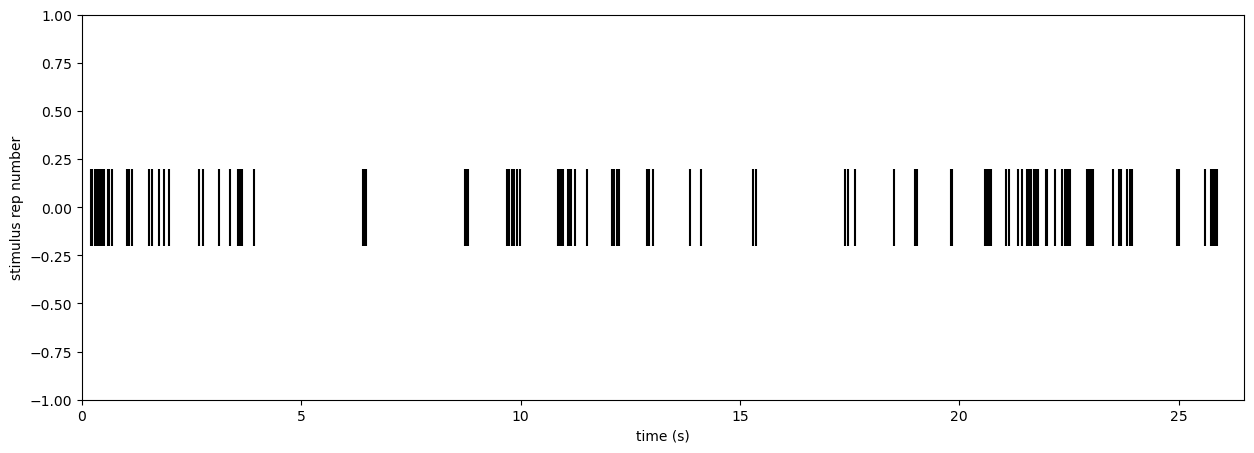

In [25]:
#plot neural spiking of first neuron -> datas_new[0]

#length (seconds) of stimulus repetition
stim_t=26.5

plt.figure (figsize=(15,5))
plt.vlines(datas_new[0], -0.2, +0.2, color='black')
plt.xlim(0,stim_t)
plt.ylim(-1,1)
plt.xlabel('time (s)')
plt.ylabel('stimulus rep number')
plt.show

**Question 4**

Assuming the data follows a Poisson process, infer the spiking rate of the first neuron. Plot the posterior distribution of the rate, compute the mean estimator, its variance, and the MLE.

<function matplotlib.pyplot.show(close=None, block=None)>

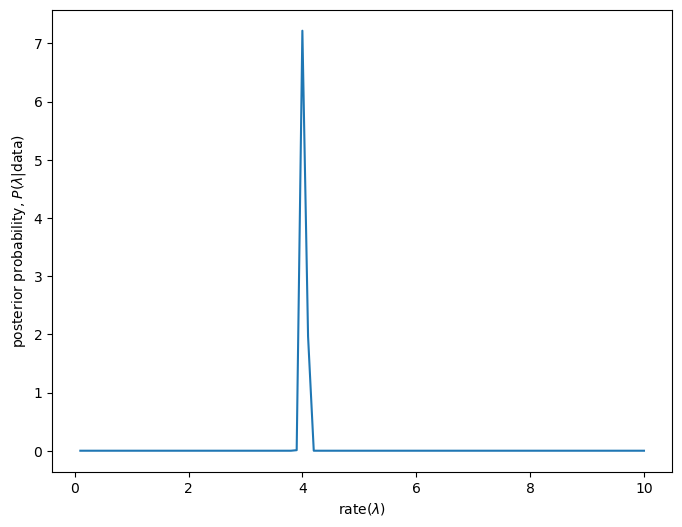

In [26]:
#Calculate the exact max_t (nearly 31800 sec) to get the whole time (T) of the distribution
max_t = np.max(datas_new[0])

#Calculate the length of spiking times to get the number of spikes
y = len(datas_new[0]) # number of spikes of first neuron


#generate a range of values for the rate parameter over which you want to calculare and plot the posterior probabilities
xran=np.linspace(start=0.1, stop=10, num=100)

#Plot the posterior distribution

plt.figure (figsize=(8,6))
plt.plot(xran,[posterior(x,max_t,y) for x in xran]) #plot the posterior prob (y-axis) for different values of rate (x-axis)
plt.xlabel('rate$(\lambda)$')
plt.ylabel('posterior probability, $P(\lambda|\mathrm{data})$') #mathmrm ensures proper formatting of labels and titles
plt.show


Why is Jorge multiplying the posterior by max_t, whereas Simona does not? I would think it should not be multuplied but jorje does it?

In [27]:
#Print mean estimator, variance and MLE

print(f'<theta>={(y+1)/max_t}; MLE={y/max_t}; var={(y+1)/max_t**2}')

<theta>=4.033819161700345; MLE=4.033504633890465; var=0.0012687483063782356


**Question 5**

Simulate a Poisson process using the inferred (mean) rate. Compare the simulations to the data. Does the model give a good fit to the data?

In [48]:
#Simulate a poisson process using inferred rate

sim_data = np.random.uniform(low= 0, high= max_t, size=np.random.poisson(theta*max_t))
sim_data.sort() #sort data in ascending order, why?
sim_data

array([1.25512678e+00, 2.39079889e+00, 6.06269705e+00, ...,
       3.17244470e+03, 3.17268089e+03, 3.17624517e+03])

In [43]:
#find the maximum remainder when each element in datas[0] is divided by stim_t, to find max time?

np.max(datas[0]%stim_t)


26.11179924011202